## Implementing the first derivative $f'(x)$ of the function:
$$sin(\phi_0)=(1+\alpha)\sqrt{1-\frac{\alpha}{1+\alpha}r^2}$$
Thus, 
$$\phi_0 = \arcsin{((1+\alpha)\sqrt{1-\frac{\alpha}{1+\alpha}r^2})}$$
Using the following formula(s) to approximate $f'(x)$, or in this case, $\frac{d\phi_0}{d\alpha}$:
$$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{2h}-O(h^2)$$

$$f'(x_i)=\frac{f(x_{i})-f(x_{i-1})}{h}$$

$$f'(x_i)=\frac{f(x_{i+1})-f(x_{i})}{h}$$

In [10]:
import numpy as np
np.set_printoptions(precision = 25)
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

# Phi_0 as a function of alpha and r
def f_phi(alpha, r):
    return (np.arcsin(np.deg2rad(((1 + alpha) * np.sqrt(1 - alpha * r * r / (1 + alpha))))))

# r as a function of alpha and phi_0
def f_r(alpha, phi):
    return (np.sqrt(alpha ** 2 + 2 * alpha - np.sin(np.deg2rad(phi)) ** 2 + 1) / np.sqrt(alpha ** 2 + alpha))

In [14]:
# Create an array for the ever-decreasing h values
h = [0.0625 / (2 ** n) for n in range(60)] # Start at 0.0625
alpha = 00.249944
r     = 02.0
phi   = 34.0

# This section is for the d_phi/d_alpha
f_phi_c = [] # Lists of centered, upper, and lower approximations
f_phi_u = []
f_phi_l = []
e_phi_c = [] # Relative errors for each approximation
e_phi_u = []
e_phi_l = []
# This section is for the d_r/d_alpha
f_r_c = [] # Lists of centered, upper, and lower approximations
f_r_u = []
f_r_l = []
e_r_c = [] # Relative errors for each approximation
e_r_u = []
e_r_l = []
for sub_h in h:
    f_x         = f_phi(alpha, r)
    f_xPlusOne  = f_phi(alpha + sub_h, r)
    f_xMinusOne = f_phi(alpha - sub_h, r)
    
    f_r_x         = f_r(alpha, phi)
    f_r_xPlusOne  = f_r(alpha + sub_h, phi)
    f_r_xMinusOne = f_r(alpha - sub_h, phi)
    
    # Add corresponding values to their lists    
    f_phi_c.append((f_xPlusOne - f_xMinusOne) / (2 * sub_h))
    f_phi_u.append((f_xPlusOne - f_x) / sub_h)
    f_phi_l.append((f_x - f_xMinusOne) / sub_h)
    
    f_r_c.append((f_r_xPlusOne - f_r_xMinusOne) / (2 * sub_h))
    f_r_u.append((f_r_xPlusOne - f_r_x) / sub_h)
    f_r_l.append((f_r_x - f_r_xMinusOne) / sub_h)
    
    # Calculate the relative error of the function(s)
    if len(f_phi_c) >= 2:
        e_phi_c.append(1 - (f_phi_c[-2] / f_phi_c[-1]))
        e_phi_u.append(1 - (f_phi_u[-2] / f_phi_u[-1]))
        e_phi_l.append(1 - (f_phi_l[-2] / f_phi_l[-1]))
        
        e_r_c.append(1 - (f_r_c[-2] / f_r_c[-1]))
        e_r_u.append(1 - (f_r_u[-2] / f_r_u[-1]))
        e_r_l.append(1 - (f_r_l[-2] / f_r_l[-1]))
        
# # Remove all NaN values, and the last element is -infinity
e_phi_c = [val for val in e_phi_c if not np.isnan(val)][:-1]
e_phi_u = [val for val in e_phi_u if not np.isnan(val)][:-1]
e_phi_l = [val for val in e_phi_l if not np.isnan(val)][:-1]

e_r_c = [val for val in e_r_c if not np.isnan(val)][:-1]
e_r_u = [val for val in e_r_u if not np.isnan(val)][:-1]
e_r_l = [val for val in e_r_l if not np.isnan(val)][:-1]

print (np.c_[f_phi_c, f_phi_u, f_phi_l][30:42])
print (np.c_[f_r_c, f_r_u, f_r_l][25:40])

[[-0.054617688059806824 -0.054617732763290405 -0.05461764335632324 ]
 [-0.05461770296096802  -0.05461776256561279  -0.05461764335632324 ]
 [-0.05461758375167847  -0.05461764335632324  -0.05461752414703369 ]
 [-0.05461752414703369  -0.05461764335632324  -0.05461740493774414 ]
 [-0.054617881774902344 -0.054617881774902344 -0.054617881774902344]
 [-0.054617881774902344 -0.05461883544921875  -0.05461692810058594 ]
 [-0.05461597442626953  -0.05461692810058594  -0.054615020751953125]
 [-0.05461883544921875  -0.054622650146484375 -0.054615020751953125]
 [-0.054615020751953125 -0.05461883544921875  -0.0546112060546875  ]
 [-0.05463409423828125  -0.0546417236328125   -0.05462646484375    ]
 [-0.0546417236328125   -0.05462646484375     -0.054656982421875   ]
 [-0.054595947265625    -0.05462646484375     -0.0545654296875     ]]
[[-2.8004819750785828 -2.8004820346832275 -2.800481915473938 ]
 [-2.800481915473938  -2.8004820346832275 -2.8004817962646484]
 [-2.8004820346832275 -2.800482749938965  -2.

After looking at the arrays, it is quite clear that the last element they all have in common is -0.05461 for $\frac{d\phi}{d\alpha}$, where they match with 6 significant digits. For $\frac{dr}{d\alpha}$, the last best approximation is -2.80048, with 6 significant digits.

The inverse of both of these values gives me -18.311664 for $\frac{d\alpha}{d\phi}$, and -0.357081 for $\frac{d\alpha}{dr}$

Combining these partial deriviates give me the final equation:
$$d\alpha = \frac{d\alpha}{d\phi}\Delta\phi + \frac{d\alpha}{dr}\Delta r$$
$$d\alpha = -18.311664\cdot\pm1.0 + -0.357081\cdot\pm0.06$$

The range of this estimation is: [-18.333089, 18.333089]. 

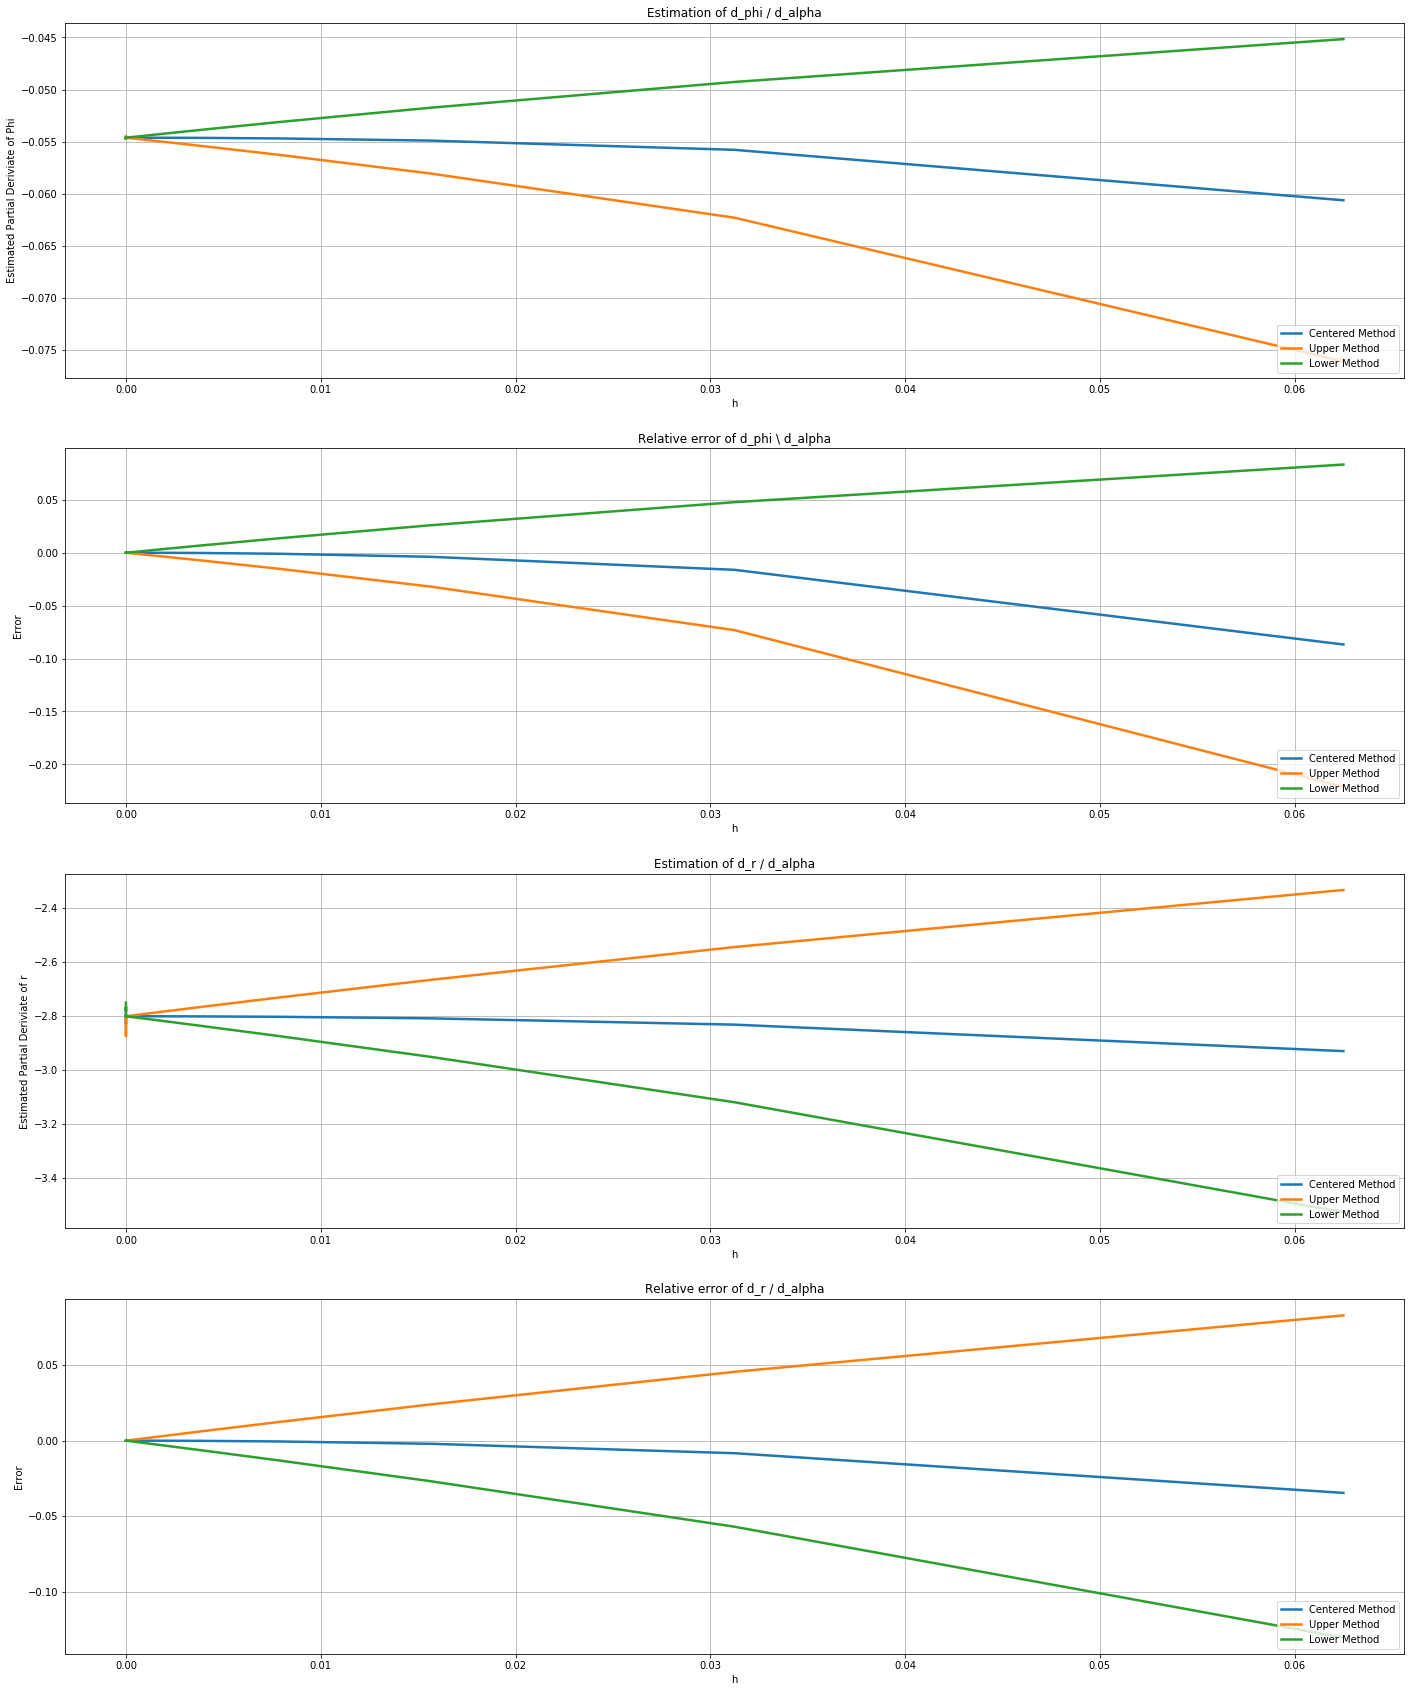

In [23]:
# Convert all lists to numpy arrays
h_np       = np.array(h)
f_phi_c_np = np.array(f_phi_c)
f_phi_u_np = np.array(f_phi_u)
f_phi_l_np = np.array(f_phi_l)
f_r_c_np   = np.array(f_r_c)
f_r_u_np   = np.array(f_r_u)
f_r_l_np   = np.array(f_r_l)
e_phi_c_np = np.array(e_phi_c)
e_phi_u_np = np.array(e_phi_u)
e_phi_l_np = np.array(e_phi_l)
e_r_c_np   = np.array(e_r_c)
e_r_u_np   = np.array(e_r_u)
e_r_l_np   = np.array(e_r_l)

# Graph 1
plt.figure(figsize=(24, 30))
plt.subplot(4, 1, 1)
plt.plot(h_np[:-14], f_phi_c_np[:-14], label="Centered Method", linewidth = 2.5)
plt.plot(h_np[:-14], f_phi_u_np[:-14], label="Upper Method", linewidth = 2.5)
plt.plot(h_np[:-14], f_phi_l_np[:-14], label="Lower Method", linewidth = 2.5)
plt.ylabel("Estimated Partial Deriviate of Phi")
plt.xlabel("h")
plt.title("Estimation of d_phi / d_alpha")
plt.grid(True)
plt.legend(loc='lower right')

# Graph 2
plt.subplot(4, 1, 2)
plt.plot(h_np[:len(e_phi_c_np)][:-14], e_phi_c_np[:-14], label="Centered Method", linewidth = 2.5)
plt.plot(h_np[:len(e_phi_u_np)][:-14], e_phi_u_np[:-14], label="Upper Method", linewidth = 2.5)
plt.plot(h_np[:len(e_phi_l_np)][:-14], e_phi_l_np[:-14], label="Lower Method", linewidth = 2.5)
plt.ylabel("Error")
plt.xlabel("h")
plt.title("Relative error of d_phi \ d_alpha")
plt.grid(True)
plt.legend(loc='lower right')

# Graph 3
plt.subplot(4, 1, 3)
plt.plot(h_np[:-15], f_r_c_np[:-15], label="Centered Method", linewidth = 2.5)
plt.plot(h_np[:-15], f_r_u_np[:-15], label="Upper Method", linewidth = 2.5)
plt.plot(h_np[:-15], f_r_l_np[:-15], label="Lower Method", linewidth = 2.5)
plt.ylabel("Estimated Partial Deriviate of r")
plt.xlabel("h")
plt.title("Estimation of d_r / d_alpha")
plt.grid(True)
plt.legend(loc='lower right')

# Graph 4
plt.subplot(4, 1, 4)
plt.plot(h_np[:len(e_r_c_np)][:-14], e_r_c_np[:-14], label="Centered Method", linewidth = 2.5)
plt.plot(h_np[:len(e_r_u_np)][:-14], e_r_u_np[:-14], label="Upper Method", linewidth = 2.5)
plt.plot(h_np[:len(e_r_l_np)][:-14], e_r_l_np[:-14], label="Lower Method", linewidth = 2.5)
plt.ylabel("Error")
plt.xlabel("h")
plt.title("Relative error of d_r / d_alpha")
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

The results of this approximation make it quite clear that the effect of $\frac{d\alpha}{d\phi}$ is _far_ greater than that of $\frac{d\alpha}{dr}$. For any kind of optimization, with regards to this problem, it's clear that reducing the variance of the launch angle would be the best option for decreasing the variance of $d\alpha$ overall. In all of these estimations, the variance of h became so small that once again the cancellation error became a problem. This, along with the prevalant problem of truncation error from the estimation itself leads to some very unstable behaviour when h becomes very small.